# Part 1 - Introduction to using the map widget

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-to-the-map-module" data-toc-modified-id="Introduction-to-the-map-module-1">Introduction to the <code>map</code> module</a></span></li><li><span><a href="#Quick-start-example" data-toc-modified-id="Quick-start-example-2">Quick start example</a></span><ul class="toc-item"><li><span><a href="#Creating-a-map-widget" data-toc-modified-id="Creating-a-map-widget-2.1">Creating a map widget</a></span></li><li><span><a href="#Adding-layers-to-the-map" data-toc-modified-id="Adding-layers-to-the-map-2.2">Adding layers to the map</a></span><ul class="toc-item"><li><span><a href="#Add-search-result-to-the-map" data-toc-modified-id="Add-search-result-to-the-map-2.2.1">Add search result to the map</a></span></li><li><span><a href="#Add-Item-to-the-map" data-toc-modified-id="Add-Item-to-the-map-2.2.2">Add Item to the map</a></span></li><li><span><a href="#Adding-layer-objects-to-the-map" data-toc-modified-id="Adding-layer-objects-to-the-map-2.2.3">Adding layer objects to the map</a></span></li></ul></li><li><span><a href="#Saving-the-map-as-a-web-map" data-toc-modified-id="Saving-the-map-as-a-web-map-2.3">Saving the map as a web map</a></span></li></ul></li><li><span><a href="#The-Object-Model-Diagram-of-the-widgets-module" data-toc-modified-id="The-Object-Model-Diagram-of-the-widgets-module-3">The Object Model Diagram of the widgets module</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4">Conclusion</a></span></li></ul></div>

## Introduction to the `map` module

The `ArcGIS API for Python` is easy to learn and extremely useful for data scientists, GIS administrators, and GIS analysts. One of the features that makes this API so powerful is its integration with `Jupyter Notebook`. The interactive Jupyter Notebook environment is built around the concept of cells that can contain executable code or text and illustrative graphics written in Markdown format. Cells can be run in any order and any number of times. When a cell is run, its output is displayed immediately below the cell. This encourages tweaking and rerunning code until the perfect solution is found—illustrating the `REPL` paradigm in action.

Because it is a web application running in a browser, Jupyter Notebook supports the display of graphic outputs. Write a snippet of Python code to plot a bar chart of household income of a county, and the chart will be displayed right below the cell containing that code.

`Jupyter Notebook` is also a great medium to work with and explore spatial data. Using just a single line of code, a live interactive map can be inserted into a notebook. Another line of code can add content to that map that is the result of a search. That content can be added with its default symbology or using smart mapping the API can figure out how best to symbolize the data. `Spatially Enabled DataFrame` (SeDF) objects returned from a query for features in a feature layer can be visualized as a table in Jupyter Notebook.

Workflows, data connections, outputs in the form of illustrative charts and maps, informational text about conclusions — these can all be stored and worked with in a notebook. A Jupyter Notebook can become a functional record of a workflow that can be shared with anyone. All the recipient must do is run the cells to reproduce that workflow. Jupyter Notebook encourages research that is reproducible, since not only the findings, but the code used to arrive at them, are stored.

The `arcgis.map` module offers components for managing maps and scenes to visualize GIS data and analysis in a rich, user-friendly, and interactive way that is specifically designed to work with 2D or 3D data content.

The `GIS` object includes a map widget (of the `arcgis.map.Map` class) for displaying geographic locations, visualizing GIS content and analysis results. Based on `ipywidgets.widgets.domwidget.DOMWidget`, the `Map` class creates a mapping widget for the JupyterLab and Notebook 7 architecture.

To use the map widget, call `gis.map()` method and assign it to a variable that you can then query to bring up the widget in the notebook. Use the `mode='3d'` argument to create a new _Scene_.

## Quick start example 

Next, let's quickly explore some examples of creating a map widget in a notebook, adding layers to it, and saving it as a web map item.

### Creating a map widget

In [1]:
from arcgis.gis import GIS
# Create a GIS object, as an anonymous user for this example
gis = GIS()

Initializing a map widget to a location centers around that area:


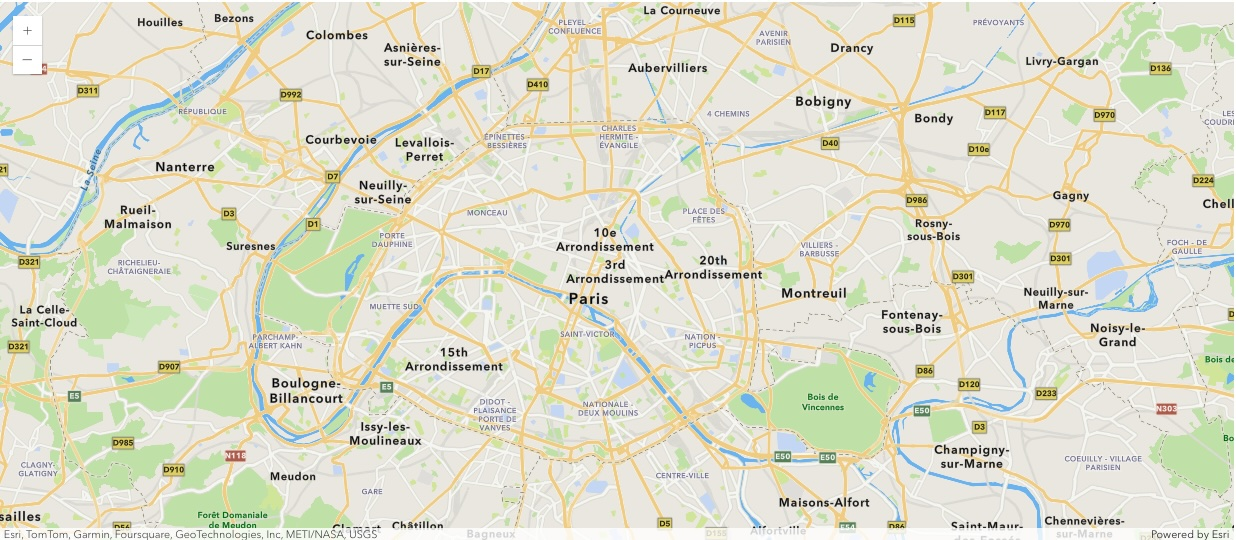

In [23]:
map1 = gis.map("Paris")
map1

### Adding layers to the map
An important functionality of the map widget is its ability to add and render web layers. To add a layer, call the `.content.add()` method and pass an `Item` or `FeatureLayer` object as an argument.


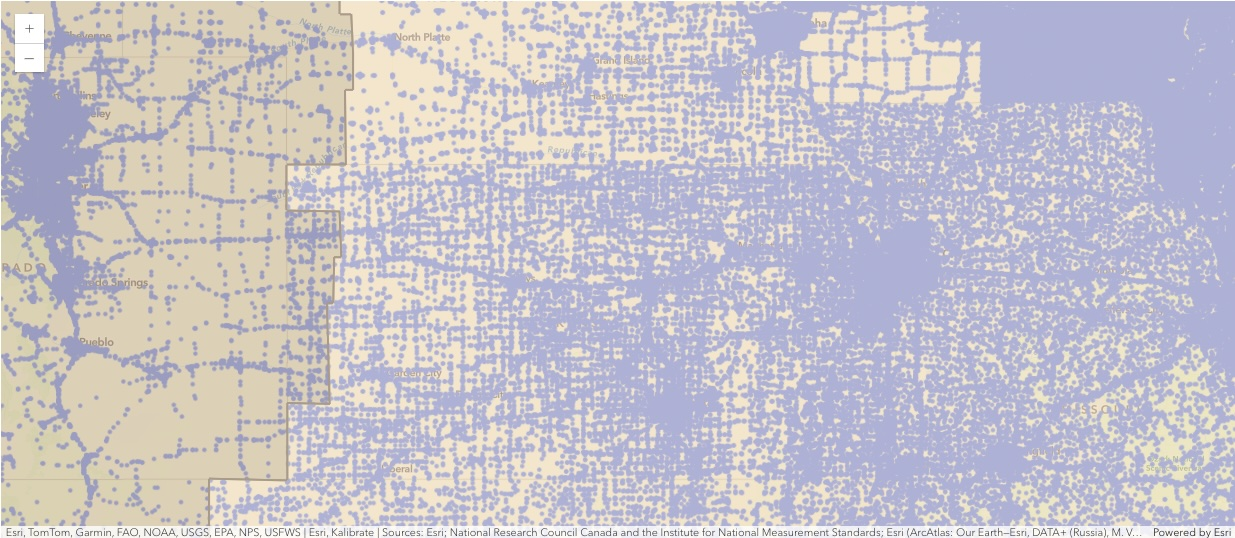

In [26]:
# Log into to GIS as we will save the widget as a web map later
gis = GIS(profile="your_online_profile")
usa_map = gis.map('USA')  # you can specify the zoom level when creating a map
usa_map

In [10]:
usa_map.center = [39, -98]

In [16]:
usa_map.zoom = 6

#### Add search result to the map

Next, search via your `GIS` instance to add the desired result to the map:

In [8]:
flayer_search_result = gis.content.search("owner:esri","Feature Layer", outside_org=True)
flayer_search_result

[<Item title:"USA Soils Map Units" type:Feature Layer Collection owner:esri>,
 <Item title:"USA Traffic Counts" type:Feature Layer Collection owner:esri>,
 <Item title:"World Exclusive Economic Zone Boundaries" type:Feature Layer Collection owner:esri>,
 <Item title:"US Vessel Traffic 2016 April" type:Feature Layer Collection owner:esri>,
 <Item title:"US Vessel Traffic 2016 July" type:Feature Layer Collection owner:esri>,
 <Item title:"US Vessel Traffic 2016 June" type:Feature Layer Collection owner:esri>,
 <Item title:"US Vessel Traffic 2016 August" type:Feature Layer Collection owner:esri>,
 <Item title:"US Vessel Traffic 2016 December" type:Feature Layer Collection owner:esri>,
 <Item title:"US Vessel Traffic 2015 September" type:Feature Layer Collection owner:esri>,
 <Item title:"US Vessel Traffic 2017 August" type:Feature Layer Collection owner:esri>]

In [15]:
usa_map.content.add(flayer_search_result[1])

In [17]:
world_timezones_item = gis.content.get('312cebfea2624e108e234220b04460b8')
usa_map.content.add(world_timezones_item)

#### Adding layer objects to the map
You can add a number of different layer objects, such as `FeatureLayer`, `FeatureCollection`, `ImageryLayer`, `MapImageLayer`, to the map. For example, you can add a `FeatureLayer`, as shown below:

In [18]:
world_countries_item = gis.content.get('ac80670eb213440ea5899bbf92a04998')
world_countries_layer = world_countries_item.layers[0]
world_countries_layer

<FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/World_Countries/FeatureServer/0">

In [19]:
usa_map.content.add(world_countries_layer, options={'opacity':0.4})

### Saving the map as a web map
You can save the map widget as a web map in your `GIS`. This process persists all the basemaps, layers added with symbology (custom or smart mapping), pop-ups, extent, and graphics in your web map.

To save a new Web Map item, call the `save()` method initialized from a new map widget. This method creates and returns a new `Item` object of type Web Map. As parameters, you can specify all valid `Item` properties as shown below:

In [21]:
webmap_properties = {'title':'USA time zones and traffic counts WebMap',
                    'snippet': 'Jupyter notebook widget saved as a web map',
                    'tags':['automation', 'python']}

webmap_item = usa_map.save(
    item_properties = webmap_properties, 
)

print(webmap_item)

<Item title:"USA time zones and traffic counts WebMap" type:Web Map owner:ArcGISPyAPIBot>


In [22]:
type(webmap_item)

arcgis.gis.Item

You can use this web map back in the notebook or in any ArcGIS app capable of rendering web maps. To learn how you can read this web map using the Python API, refer to the other parts of this notebook guide series.

## The Object Model Diagram of the widgets module

Any map widget instance is of the `arcgis.widgets.MapView` class, based on `ipywidgets.widgets.domwidget.DOMWidget`. The `arcgis.widgets.MapView` class resides inside the `arcgis.widgets` module.


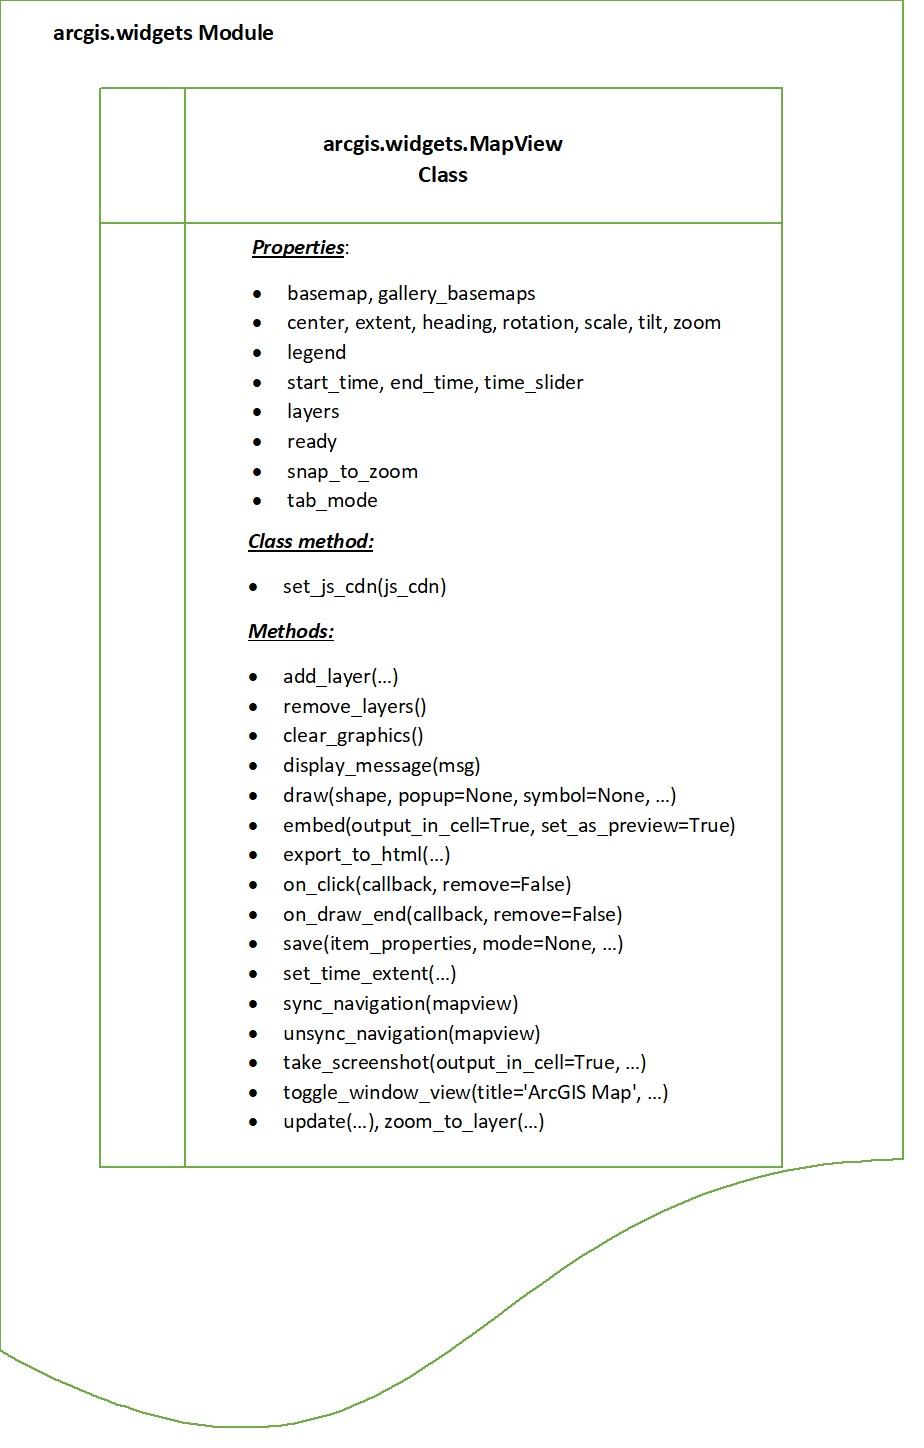

In [11]:
# The object model diagram of the widgets module is shown below

## Conclusion

In Part 1 of this guide series, we have explored the basic concepts and uses of web maps, the fundamental structure of the `widgets` module, and quickly walked through some starter examples of visualizing a map in the widget. In the following chapters of this guide series, we will discuss more advanced topics of mapping and map widgets.

<a href="#Part-1---Introduction-to-using-the-map-widget">Back to Top</a>